Spin up: 50, Spin down: 50


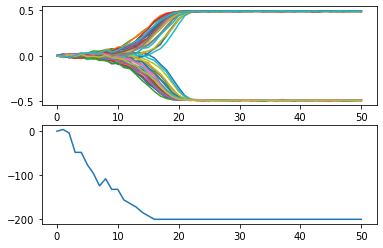

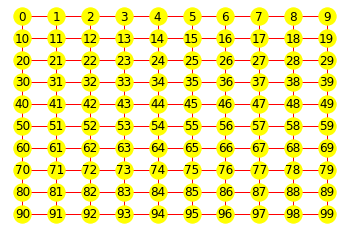

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def modulator(x, y):
    out = pow(np.cos(x + y - np.pi/4), 2) - 0.5
    return out


def feedback(x, alpha, beta, J):
    fb = beta * J
    np.fill_diagonal(fb, alpha)
    fb_signal = np.dot(fb, x)
    return fb_signal


def Ising_Energy(x, J):
    A = np.dot(J, x)
    B = np.dot(x.T, A)
    energy = -0.5 * B
    return energy


# Normalization (+1 or -1) of spin amplitude
def normal(amplitude_array):
    for i,val in enumerate(amplitude_array):
        if(val > 0):
            amplitude_array[i] = 1
        elif(val < 0):
            amplitude_array[i] = -1
    return amplitude_array


# Main
N_node = 10
N_spin = pow(N_node, 2)
K_inter = 50

# System paramaters
alpha = 0.25    # feedback strength
beta = 0.29    # coupling strength

# Jmn: Spin coupling
J = np.zeros( [N_spin, N_spin] )
s = N_node - 1
J[s][s + 90] = -1
J[s + 90][s] = -1
J[s * 10][s * 10 + 9] = -1
J[s * 10 + 9][s * 10] = -1
for i in range(0, N_node-1):
    J[i][i + 90] = -1
    J[i + 90][i] = -1
    J[i * 10][i * 10 + 9] = -1
    J[i * 10 + 9][i * 10] = -1
    J[i * 10 + 9][i * 10 + 19] = -1
    J[i * 10 + 19][i * 10 + 9] = -1
    J[90 + i][91 + i] = -1
    J[91 + i][90 + i] = -1
    for j in range(0, N_node-1):
        node_indax = i*10+j
        J[node_indax][node_indax + 1] = -1
        J[node_indax][node_indax + 10] = -1
        J[node_indax + 1][node_indax] = -1
        J[node_indax + 10][node_indax] = -1

# Array for data storaginmg
x_k = np.zeros([N_spin, 1])    # spin amplitude at each iteration
x_f = np.zeros([N_spin, 1])    # feedback signal
energy = np.zeros([K_inter + 1, 1])    # Ising energy during different iteration
bifur = np.zeros([N_spin, 1])

# Gaussian white noise
noise = np.random.normal(0, 0.01, [N_spin, K_inter])

# Iteration
for i in range(K_inter):
    x_f = feedback(x_k, alpha, beta, J)
    # noise = np.random.normal(0, 0.01, [N_spin,1])    # Gaussian white noise
    # x_k = modulator( x_f, noise )
    x_k = modulator( x_f, np.array([noise[:, i]]).T )
    x_tem = x_k.copy()
    x_tem = normal(x_tem)
    energy[i+1] = Ising_Energy(x_tem, J)
    bifur = np.c_[bifur, x_k]

# Number of spin state
num_up = np.sum(x_k > 0)
num_down = np.sum(x_k < 0)
print("Spin up: {}, Spin down: {}".format(num_up, num_down))

# visualization
plt.subplot(2, 1, 1)
for i in range(K_inter):
    plt.plot(bifur[i])
plt.subplot(2, 1, 2)
plt.plot(energy, '-')
plt.show()

# Square lattice
G = nx.grid_2d_graph(N_node, N_node)
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i + (N_node - 1- j) * 10) for i, j in G.nodes() )
nx.draw_networkx(G, pos=pos, node_color="yellow", labels=labels, edge_color="red")
# visualization
plt.axis('off')
plt.show()
# Label nodes
nodes = G.nodes()
# Label edges
edges = G.edges()